In [93]:
import numpy as np;
import csv
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold 
import math

import sklearn
import statistics as stcs
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,scale,MinMaxScaler
from scipy.stats import uniform,expon
from sklearn.model_selection import cross_val_score
from time import time

In [1]:
data = pd.read_csv('NMC_numerical.csv')

np.random.seed(1001)
def data_split (data, test_ratio):
    df = pd.DataFrame(data)
    total_row = df.shape[0]
    test_row = round(total_row *test_ratio)
    train_row = total_row -test_row
    indices =np.random.permutation(total_row)
    train_indx, test_idx =indices[:train_row], indices[train_row:]
    train,test = df.iloc[train_indx,:], df.iloc[test_idx,:]
    X_test = test.iloc[:,0:35]
    y_test = test.iloc [:,36]
    X_train = train.iloc[:,0:35]
    y_train = train.iloc [:,36]
    return train,test,X_train,y_train,X_test,y_test
    
train,test,X_train,y_train,X_test,y_test = data_split(data,0.2)

kf = KFold(n_splits=10,random_state =1001,shuffle= True)



NameError: name 'pd' is not defined

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = pd.DataFrame(scaling.transform(X_test))

In [86]:
clf = StandardScaler(with_mean=True,with_std=True)
print(clf.fit(X_test))
print(clf.mean_)

X_test = pd.DataFrame(clf.transform(X_test))

print(clf.fit(X_train))
print(clf.mean_)
X_train = pd.DataFrame(clf.transform(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.05397059e+00 4.21088235e-01 1.81235294e-01 3.18705882e-01
 2.67941176e-02 2.86320588e+00 1.42244088e+01 1.00991235e+02
 1.14176471e+02 2.54558824e+00 4.52058824e+00 6.49744118e+01
 9.22188235e+01 2.85882353e+01 1.39794118e+00 4.38529412e-01
 5.56176471e-01 5.33823529e-01 3.23235294e-01 1.30294118e+01
 6.30382353e+02 1.20264706e+02 1.09911765e+02 1.30205882e+02
 9.93235294e+01 4.01705882e-01 3.58117647e-01 7.64470588e-01
 3.84000000e-01 9.01705882e-01 1.55588235e+02 1.58823529e+01
 2.11764706e+01 2.11764706e+01 1.79411765e+01]
StandardScaler(copy=True, with_mean=True, with_std=True)
[1.05327407e+00 4.51525926e-01 1.75577778e-01 2.92014815e-01
 2.84296296e-02 2.86484296e+00 1.42284696e+01 1.01135193e+02
 1.18084444e+02 2.52851852e+00 4.52740741e+00 6.85400741e+01
 9.22019259e+01 3.02370370e+01 1.51066667e+00 5.54222222e-01
 4.78000000e-01 4.57037037e-01 2.94000000e-01 1.46518519e+01
 6.43229630e+02 1.39451852e+02 1.13133333e+02 

limit_output extension: Maximum message size of 1000 exceeded with 1184 characters

In [99]:
rand_para = {'C':np.logspace(-4,4),'gamma':np.logspace(-2,-2),'kernel':['rbf']}
svm_model =SVR()
n_iteration = 2500
Scoring = ['explained_variance','neg_mean_squared_error',"r2"]
random_search = RandomizedSearchCV(svm_model,param_distributions=rand_para,cv =10,scoring=Scoring,
                                   error_score=0,random_state=1001,return_train_score=True,n_jobs=-1,n_iter=n_iteration,verbose=10,refit=False)


start = time()

random_search.fit(X_train,y_train)

#y_predict=random_search.predict(X_test)
#math.sqrt(stcs.mean((y_predict-y_test)**2))



Fitting 10 folds for each of 2500 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0244s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1056 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 1600 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 1904 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2208 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: 

limit_output extension: Maximum message size of 1000 exceeded with 1040 characters

In [96]:
a=pd.DataFrame(random_search.cv_results_)

model=random_search.best_params_

y_predict= random_search.predict(X_test)
math.sqrt(stcs.mean((y_predict-y_test)**2))

y_predict=random_search.predict(X_test)
math.sqrt(stcs.mean((y_predict-y_test)**2))

In [98]:
a.to_csv('EC_trail_1_NMC_SVR_hp.csv')

ValueError: x and y must be the same size

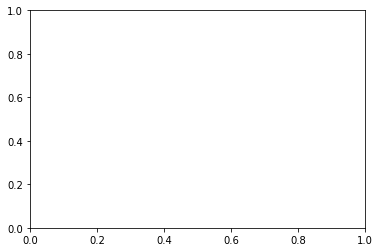

In [50]:
plt.scatter(x=y_predict,y=y_test )
plt.axis([80,250,80,250])
plt.xlabel('Predicted Initial Discharge Capacity (mAh/g)')
plt.ylabel('Experimental Initial Discharge Capacity (mAh/g)')

# Model training

In [71]:
svm_model_optimal =SVR(kernel ='rbf',gamma=0.00848343,C=954.095476)
np.random.seed(1001)
svm_model_optimal.fit(X_train,y_train)
y_predict=svm_model_optimal.predict(X_test)

In [72]:
np.random.seed(1001)

svm_model_train =SVR(kernel ='rbf',gamma=0.00848343,C=954.095476)

train_results =[]
train_results_name =['Experimental IC','Predicted IC','RMSE']


for train_index, test_index in kf.split(X_train):
    #print("Train:", train_index, "Validation:", test_index)
    X_training, X_validate = X_train.iloc[train_index], X_train.iloc[test_index]
    y_training, y_validate = y_train.iloc[train_index], y_train.iloc[test_index]
    np.random.seed(1001)
    svm_model_train.fit(X_training,y_training)
    y_train_predicted = svm_model_train.predict(X_validate)
    RMSE = math.sqrt(stcs.mean((y_train_predicted-y_validate)**2))
    train_results.append([y_validate,y_train_predicted,RMSE])


In [73]:
Train_results =pd.DataFrame (train_results,columns=train_results_name)

In [74]:
np.average(Train_results['RMSE'])

18.379734975595433

In [75]:
predict_results = pd.DataFrame (Train_results.iloc[:,1])

#predict_results.drop(labels=None)

In [77]:
predict_results

,Predicted IC
0,"[128.67318757805384, 219.13496789751696, 172.5..."
1,"[158.3775525090234, 212.8927128212616, 168.705..."
2,"[184.59571752516308, 194.60867559492033, 171.5..."
3,"[145.12162672070227, 204.7401874401966, 174.31..."
4,"[186.58335591549127, 201.8626036867003, 181.70..."
5,"[182.99013784102658, 212.81996498887275, 211.7..."


limit_output extension: Maximum message size of 1000 exceeded with 1429 characters

In [78]:
Experimental =[]
Predicted =[]

for i in range(Train_results.shape[0]):
    Ex=Train_results.iloc[i,0].to_string(index=False)
    Pred = pd.DataFrame(Train_results.iloc[i,1]).to_string(index_names=False,index=False,header=False)
    Ex_num = Ex.split("\n ")
    Pre = Pred.split("\n ")
    a = np.array([float(i) for i in Ex_num])
    b = np.array([float(c) for c in Pre])
    Experimental.extend(a)
    Predicted.extend(b)


In [79]:
predict_results

,Predicted IC
0,"[128.67318757805384, 219.13496789751696, 172.5..."
1,"[158.3775525090234, 212.8927128212616, 168.705..."
2,"[184.59571752516308, 194.60867559492033, 171.5..."
3,"[145.12162672070227, 204.7401874401966, 174.31..."
4,"[186.58335591549127, 201.8626036867003, 181.70..."
5,"[182.99013784102658, 212.81996498887275, 211.7..."


limit_output extension: Maximum message size of 1000 exceeded with 1429 characters

In [80]:
Ex= pd.DataFrame(Experimental)

Pred = pd.DataFrame(Predicted)

results =pd.concat([Ex,Pred],axis=1, sort=False)

In [81]:

RMSE = math.sqrt(np.average((results.iloc[:,0]-results.iloc[:,1])**2))
SS_res = sum((results.iloc[:,0]-results.iloc[:,1])**2)
SS_tot = sum((results.iloc[:,0]-stcs.mean(results.iloc[:,0]))**2)


In [82]:
1-(SS_res/SS_tot)

0.7786093509915042

In [83]:
RMSE

19.288341242293846